In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.listdir('../data/')

['2018년 10월 서울시 차량통행속도.xlsx',
 '2018년 11월 서울시 차량통행속도.xlsx',
 '2018년 12월 서울시 차량통행속도.xlsx',
 '2019년 01월 서울시 차량통행속도.xlsx',
 '2019년 02월 서울시 차량통행속도.xlsx',
 '2019년 03월 서울시 차량통행속도.xlsx']

In [ ]:
dt_201903 = pd.read_csv('../data/dt_201903.csv')

In [89]:
dt_201903 = pd.read_excel('../data/2019년 03월 서울시 차량통행속도.xlsx')
dt_201903 = pd.melt(dt_201903, id_vars= dt_201903.columns[:12])
dt_201903['variable'] = dt_201903['variable'].map(lambda x : int(x[:2]))
dt_201903.rename(columns = {'variable' : 'time'}, inplace = True)


#dt_201903.to_csv('../data/dt_201903.csv', index = False)
dt_201903.head()

,일자,요일,도로명,링크아이디,시점명,종점명,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,time,value
0,20190301,금,4.19로,1080012200,아카데미하우스,국립4.19묘지,상행,1179,1,보조간선도로,외곽,강북구,1,44.60
1,20190301,금,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1,보조간선도로,외곽,강북구,1,16.46
2,20190301,금,4.19로,1080012700,국립4.19묘지입구,국립4.19묘지,하행,354,2,보조간선도로,외곽,강북구,1,27.55
3,20190301,금,4.19로,1080012100,국립4.19묘지,아카데미하우스,하행,1190,2,보조간선도로,외곽,강북구,1,47.88
4,20190301,금,가락로,1230024700,방이초교,방이동고분군,상행,844,1,기타도로,외곽,송파구,1,27.57


In [13]:
dt_201903.shape

(3530280, 14)

In [75]:
dt_201903.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3530280 entries, 0 to 3530279
Data columns (total 14 columns):
일자          int64
요일          object
도로명         object
링크아이디       int64
시점명         object
종점명         object
방향          object
거리          int64
차선수         int64
기능유형구분      object
도심/외곽구분     object
권역구분        object
variable    int64
value       float64
dtypes: float64(1), int64(5), object(8)
memory usage: 377.1+ MB


질문!
근처에 학교가 있으면 스쿨존 같은거 변수로 가능할듯!

# 도로명

In [18]:
print('도로명 unique 개수 : ',len(np.unique(dt_201903['도로명'])))

도로명 unique 개수 :  472


# 요일별

In [91]:
#요일별, 시간대별 평균 속도
days_time = pd.DataFrame(dt_201903.groupby(['요일','time'])['value'].mean())
days_time = days_time.unstack()
days_time

value                                                         \
time         1          2          3          4          5          6    
요일                                                                       
금     32.054134  33.667984  34.682037  35.472251  35.414650  33.933902   
목     32.327261  33.867961  34.781703  35.547371  35.384971  33.801702   
수     32.540952  34.075899  35.126861  35.899148  35.767853  34.139042   
월     33.800968  35.159371  36.078031  36.687551  36.200870  34.063775   
일     32.230297  33.690058  34.697026  35.577510  35.797619  34.970392   
토     31.382912  32.677448  33.778289  34.707033  34.853763  33.643056   
화     32.830627  34.255391  35.230698  35.980839  35.734659  34.062454   

                                                    ...                 \
time         7          8          9          10    ...             15   
요일                                                  ...                  
금     31.631893  29.031283  26.273487  25.849780    ...      25.232590   
목     31.392667  28.076591  24.732342  24.666889    ...      25.501859   
수     31.521720  28.162433  24.945193  24.897489    ...      25.362195   
월     30.827679  27.201260  24.431592  24.994449    ...      25.995510   
일     34.207479  33.948674  32.737383  30.943083    ...      26.541715   
토     32.380129  31.944409  30.522432  28.172356    ...      23.748714   
화     31.355426  27.962764  24.731831  24.753446    ...      25.593759   

                                                                        \
time         16         17         18         19         20         21   
요일                                                                       
금     24.642732  23.840384  22.396131  21.625772  22.462263  25.088641   
목     24.977006  24.544898  23.524759  22.627428  23.791942  26.711002   
수     24.633844  24.106269  23.158910  22.020736  23.082755  26.186714   
월     25.419896  25.119972  24.274951  23.524914  24.630671  27.528474   
일     26.332342  26.350955  26.576934  27.347728  27.844521  28.660022   
토     23.875339  23.748729  23.339354  23.791653  25.473358  27.267751   
화     25.110600  24.674811  23.711551  22.835602  24.025854  26.887481   

                                       
time         22         23         24  
요일                                     
금     26.852645  27.712958  29.480570  
목     27.784474  28.214575  30.214958  
수     27.466632  28.193452  30.318319  
월     28.623259  29.252335  31.120813  
일     29.342482  30.481695  32.249048  
토     28.042527  28.826334  30.578039  
화     28.077376  28.611106  30.600805  

[7 rows x 24 columns]

[]

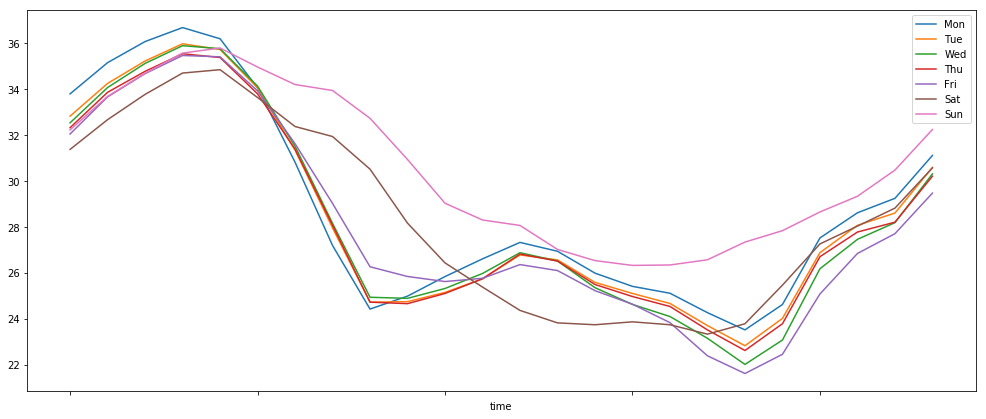

In [92]:
plt.figure(figsize=(17,7))
days_time.loc['월', :].plot(label = 'Mon')
days_time.loc['화', :].plot(label = 'Tue')
days_time.loc['수', :].plot(label = 'Wed')
days_time.loc['목', :].plot(label = 'Thu')
days_time.loc['금', :].plot(label = 'Fri')
days_time.loc['토', :].plot(label = 'Sat')
days_time.loc['일', :].plot(label = 'Sun')

plt.xlabel('time')
plt.legend()
plt.plot()

월,화,수,목이 비슷하고 금/토/일

# 거리

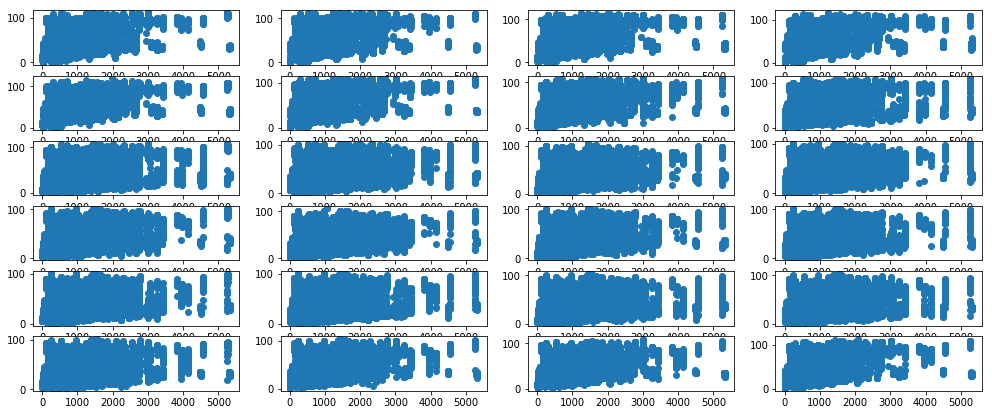

In [106]:
plt.figure(figsize=(17,7))
for i in range(1,25) :
    
    plt.subplot(6,4,i)
    
    mask = dt_201903.time == i
    plt.scatter(dt_201903.loc[mask,'거리'], dt_201903.loc[mask,'value'])

# 도로명

# 권역구분

In [112]:
print(np.unique(dt_201903['권역구분']))
print('구 개수 : ', len(np.unique(dt_201903['권역구분'])))

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
구 개수 :  25


In [114]:
#구별, 시간대별 평균 속도
district_time = pd.DataFrame(dt_201903.groupby(['권역구분','time'])['value'].mean())
district_time = district_time.unstack()
district_time.head()

value                                                         \
time         1          2          3          4          5          6    
권역구분                                                                     
강남구   34.478680  36.020617  37.130934  37.919710  38.191747  37.376125   
강동구   30.829005  32.105806  33.073266  33.791107  33.345322  31.563515   
강북구   25.922358  26.997974  28.495790  29.526810  29.617994  27.905651   
강서구   33.142200  34.576484  35.382774  36.151883  35.387903  33.228471   
관악구   33.916205  35.026158  36.018273  36.857396  36.747745  35.660994   

                                                    ...                 \
time         7          8          9          10    ...             15   
권역구분                                                ...                  
강남구   35.223921  32.256150  29.406780  28.182558    ...      25.604788   
강동구   29.263588  27.303822  25.534206  25.608155    ...      25.065851   
강북구   26.421942  25.048568  23.590052  22.677819    ...      21.432745   
강서구   30.788543  28.118485  26.168437  25.901841    ...      25.525295   
관악구   34.027326  32.231059  30.172959  29.353525    ...      28.313176   

                                                                        \
time         16         17         18         19         20         21   
권역구분                                                                     
강남구   25.068680  24.590397  23.511678  23.209528  24.942607  28.514282   
강동구   24.635427  24.328003  23.745935  23.514530  24.008926  25.748214   
강북구   21.236416  21.517497  21.187713  20.625100  20.980723  21.915268   
강서구   25.038565  24.627747  23.423836  23.041884  24.818789  27.335199   
관악구   28.063100  27.806868  27.151138  26.948540  27.329296  29.131616   

                                       
time         22         23         24  
권역구분                                   
강남구   29.559592  29.886217  32.766447  
강동구   26.579139  27.469391  29.145848  
강북구   22.868778  23.727887  24.273071  
강서구   28.152119  28.924279  31.070712  
관악구   29.972883  30.676276  32.169833  

[5 rows x 24 columns]

[]

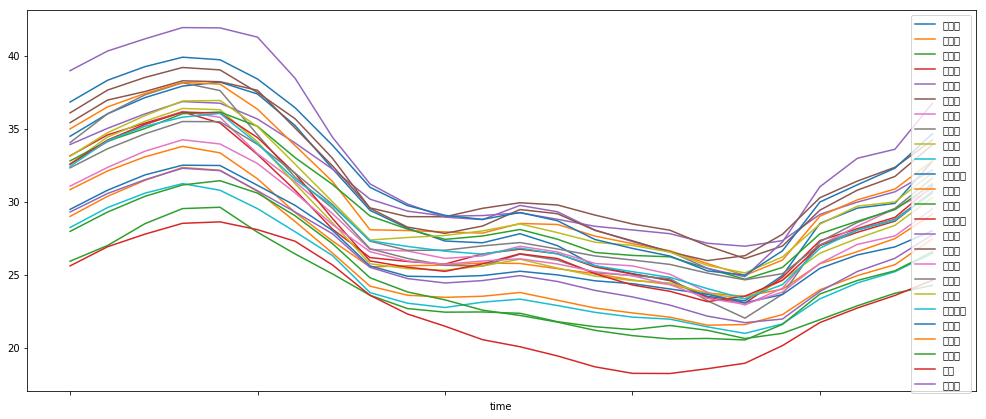

In [125]:
districts = list(district_time.index)

plt.figure(figsize=(17,7))
for dist in districts :
    district_time.loc[dist, :].plot(label = dist)

plt.xlabel('time')
plt.legend()
plt.plot()

# time

시간별 평균 속도

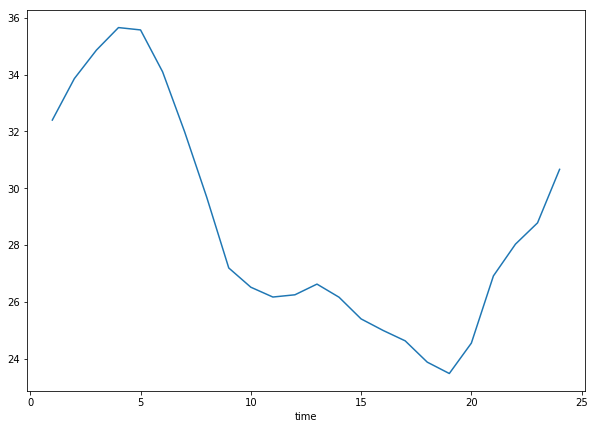

In [111]:
plt.figure(figsize = (10,7))
dt_201903.groupby('time')['value'].mean().plot()

In [108]:
dt_201903.head(20)

,일자,요일,도로명,링크아이디,시점명,종점명,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,time,value
0,20190301,금,4.19로,1080012200,아카데미하우스,국립4.19묘지,상행,1179,1,보조간선도로,외곽,강북구,1,44.60
1,20190301,금,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1,보조간선도로,외곽,강북구,1,16.46
2,20190301,금,4.19로,1080012700,국립4.19묘지입구,국립4.19묘지,하행,354,2,보조간선도로,외곽,강북구,1,27.55
3,20190301,금,4.19로,1080012100,국립4.19묘지,아카데미하우스,하행,1190,2,보조간선도로,외곽,강북구,1,47.88
4,20190301,금,가락로,1230024700,방이초교,방이동고분군,상행,844,1,기타도로,외곽,송파구,1,27.57
5,20190301,금,가락로,1230019500,방이동고분군,송파한양아파트,상행,416,1,기타도로,외곽,송파구,1,32.93
6,20190301,금,가락로,1230016300,송파한양아파트,송파사거리,상행,478,1,기타도로,외곽,송파구,1,25.23
7,20190301,금,가락로,1230014100,송파사거리,배명고교,상행,1288,1,기타도로,외곽,송파구,1,24.25
8,20190301,금,가락로,1230014200,배명고교,송파사거리,하행,1288,1,기타도로,외곽,송파구,1,25.50
9,20190301,금,가락로,1230016400,송파사거리,송파한양아파트,하행,484,1,기타도로,외곽,송파구,1,25.50
